In [1]:
import os
import glob
import pandas as pd

x = glob.glob('./results/*.csv')
x

['./results/SelectionSort.csv',
 './results/HeapSort.csv',
 './results/MergeSort.csv',
 './results/BubbleSort.csv',
 './results/RadixSort.csv',
 './results/InsertionSort.csv',
 './results/ShellSort.csv',
 './results/RandomizedQuickSort.csv',
 './results/CountingSort.csv']

In [2]:
result_df = pd.DataFrame()
for csv in x:
    df = pd.read_csv(csv)
    df['sorter'] = csv.split('.')[1].split('/')[-1]
    result_df = pd.concat([result_df, df], axis=0)
result_df

,elapsed_time,size,min_value,max_value,success,sorter
0,0.000002,1,-100,100 True,NaN,SelectionSort
1,0.000002,1,-10,100 True,NaN,SelectionSort
2,0.000003,1,-100,-10 True,NaN,SelectionSort
3,0.000002,1,-10,0 True,NaN,SelectionSort
4,0.000002,1,-100,10 True,NaN,SelectionSort
...,...,...,...,...,...,...
356,0.000153,1000,-10,10 False,NaN,CountingSort
357,0.004291,1000,0,10 True,NaN,CountingSort
358,0.000165,1000,-10,100 False,NaN,CountingSort
359,0.000155,1000,0,100 True,NaN,CountingSort


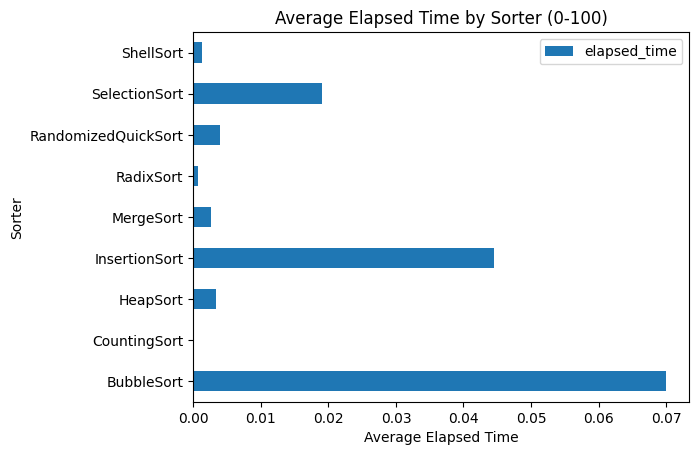

Index(['elapsed_time', 'size', 'min_value', 'max_value', 'success', 'sorter'], dtype='object')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already executed the following line
# result_df.groupby('sorter')['elapsed_time'].mean()

# Create a DataFrame with the grouped mean values
mean_df = result_df.groupby('sorter')['elapsed_time'].mean().reset_index()

# Create the bar plot
mean_df.plot(x='sorter', y='elapsed_time', kind='barh')

# Set the plot title and axis labels
plt.title('Average Elapsed Time by Sorter (0-100)')
plt.ylabel('Sorter')
plt.xlabel('Average Elapsed Time')

# Display the plot
plt.show()
result_df.columns

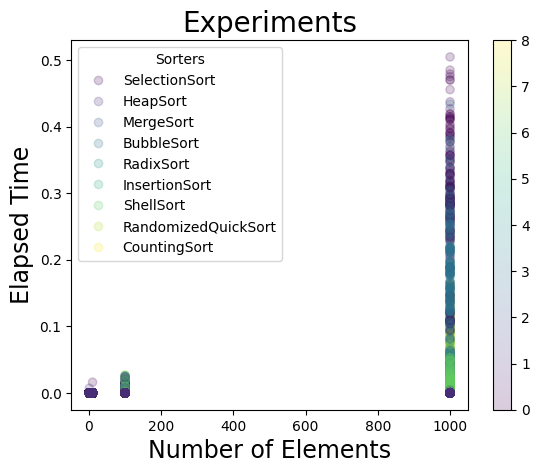

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming your data is stored in a DataFrame called 'result_df'
# with columns ['elapsed_time', 'size', 'min_value', 'max_value', 'sorter']

# Scatter plot
sorters_names = result_df['sorter'].unique()
scatter = plt.scatter(result_df['size'], result_df['elapsed_time'] ,c=result_df.sorter.astype('category').cat.codes, alpha=0.2)

# Set labels and title
plt.xlabel('Number of Elements', size=17)
plt.ylabel('Elapsed Time', size=17)
plt.title('Experiments', size=20)


plt.legend(handles=scatter.legend_elements()[0], 
           labels=list(sorters_names),
           title="Sorters",
           loc="upper left")

# Add color bar legend
plt.colorbar()

# Display the plot
plt.show()
